Projeto Bayesian Networks para doenças cardiovasculares

Load the datasets

In [81]:
import pandas as pd


# Load the datasets
train_data = pd.read_csv('cardiovascular_train.csv')
test_data = pd.read_csv('cardiovascular_test.csv')



Identify variables and their unique values

In [82]:
for column in train_data.columns:
    unique_values = train_data[column].unique()
    print(f"{column}: {unique_values}")

Age: ['54-64' '24-34' '34-44' '44-54' '64-74' '18-24']
Anxiety: ['No' 'Yes']
BodyMassIndex: ['Overweight' 'Obese' 'Normal' 'Underweight']
Depression: ['No' 'Yes']
Diabetes: ['No' 'Yes']
EducationLevel: [2 3 1]
Hypercholesterolemia: ['No' 'Yes']
Hypertension: ['No' 'Yes']
PhysicalActivity: ['Regularly Active' 'Insufficiently Active']
Sex: ['Male' 'Female']
SleepDuration: ['6-9hours' '<6hours' '>9hours']
SmokerProfile: ['Smoker' 'Non_Smoker' 'Ex_Smoker']
SocioeconomicStatus: [3 1 2]


Simplifying the data 

In [83]:
binary_vars = ['Anxiety', 'Depression', 'Diabetes', 'Hypercholesterolemia', 'Hypertension']
train_data[binary_vars] = train_data[binary_vars].replace({'No': 0, 'Yes': 1})

train_data['Age'] = train_data['Age'].map({'18-24': 1, '24-34': 2, '34-44': 3, '44-54': 4, '54-64': 5, '64-74': 6})
train_data['BodyMassIndex'] = train_data['BodyMassIndex'].map({'Underweight': 1, 'Normal': 2, 'Overweight': 3, 'Obese': 4})
train_data['SleepDuration'] = train_data['SleepDuration'].map({'<6hours': 1, '6-9hours': 2, '>9hours': 3})

nominal_vars = ['PhysicalActivity', 'Sex', 'SmokerProfile', 'SocioeconomicStatus']

C:\Users\franc\AppData\Local\Temp\ipykernel_4604\1124151283.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data[binary_vars] = train_data[binary_vars].replace({'No': 0, 'Yes': 1})


description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3845 entries, 0 to 3844
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   3845 non-null   int64 
 1   Anxiety               3845 non-null   int64 
 2   BodyMassIndex         3845 non-null   int64 
 3   Depression            3845 non-null   int64 
 4   Diabetes              3845 non-null   int64 
 5   EducationLevel        3845 non-null   int64 
 6   Hypercholesterolemia  3845 non-null   int64 
 7   Hypertension          3845 non-null   int64 
 8   PhysicalActivity      3845 non-null   object
 9   Sex                   3845 non-null   object
 10  SleepDuration         3845 non-null   int64 
 11  SmokerProfile         3845 non-null   object
 12  SocioeconomicStatus   3845 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 390.6+ KB
Statistics
               Age      Anxiety  BodyMassIndex   Depression     Dia

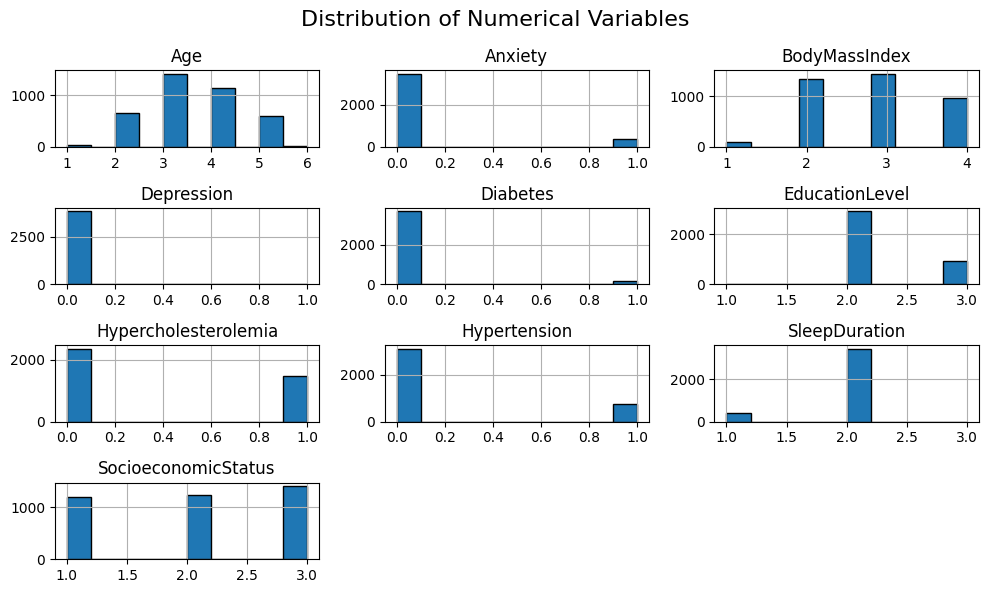

In [84]:
import seaborn as sns
print("description")
train_data.info()

# Get a summary of statistics for numerical columns
print("Statistics")
print(train_data.describe())

# List of categorical columns
categorical_vars = train_data.select_dtypes(include=['object']).columns

for column in train_data.columns:
    print(f"Occurrences of unique values in '{column}':")
    print(train_data[column].value_counts())
    print()  # Adds a line break for better readability

# List of numerical columns
numerical_vars = train_data.select_dtypes(include=['int64']).columns


# You can also use histograms to visualize the distribution
import matplotlib.pyplot as plt
#graps
train_data[numerical_vars].hist(bins=10, figsize=(10, 6), edgecolor='black')  # Reduced the number of bins
plt.suptitle('Distribution of Numerical Variables', fontsize=16)
plt.tight_layout()  # To make the layout more compact
plt.show()

